I think it's most appropriate to build models for each coral group for *all* islands. I'm looking to predict out to grids that have not been sampled for some of the coral groups in some regions; I don't think conditions will vary so dramatically between islands that island-specific models will offer anything beyond what group-sprecific all-island models offer.

For the models, I'm using group-level data from the following islands:

1. SCLER_CORA: Tut
2. MASSIVE: OfuOlo, Tau, Tut
3. PLATE_LIKE: Tut
4. ENCRUSTING: OfuOlo, Tau, Tut
5. BRANCHING: OfuOlo, Tau, Tut
6. COLUMNAR: OfuOlo, Tau, Tut
7. FREE_LIVIN: OfuOlo, Tau, Tut

I need to...
    - [X] load all dfs
    - [X] add island col as ID
    - [X] rbind the dfs by group
    - [X] check for duplicates, outliers, correlations > 0.7
    - [X] impute any missing data

### Load libraries

In [1]:
library(caret)
require(caTools)
library(dismo)
library(dplyr)
library(lattice)
library(mice)
library(raster)
library(rgdal)
library(sp)

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: caTools

Loading required package: raster

Warning message:
"package 'raster' was built under R version 3.6.3"
Loading required package: sp

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:raster':

    intersect, select, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'mice' was built under R version 3.6.3"

Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Warning message:
"package 'rgdal' was built under R version 3.6.3"
rgdal: version: 1.4-8, (SVN revisio

### Reload dataframes, add island column as ID

##### OfuOlo

In [2]:
setwd('C:/Users/linds/OneDrive/Documents/samoa_corals_data/OfuOlo/')

oo_branching<-read.csv('oo_branching_df.csv')
oo_columnar<-read.csv('oo_columnar_df.csv')
oo_encrusting<-read.csv('oo_encrusting_df.csv')
oo_free_livin<-read.csv('oo_free_livin_df.csv')
oo_massive<-read.csv('oo_massive_df.csv')

oo_branching['ID']<-'OfuOlo'
oo_columnar['ID']<-'OfuOlo'
oo_encrusting['ID']<-'OfuOlo'
oo_free_livin['ID']<-'OfuOlo'
oo_massive['ID']<-'OfuOlo'

##### Tau

In [3]:
setwd('C:/Users/linds/OneDrive/Documents/samoa_corals_data/Tau/')

tau_branching<-read.csv('tau_branching_df.csv')
tau_columnar<-read.csv('tau_columnar_df.csv')
tau_encrusting<-read.csv('tau_encrusting_df.csv')
tau_free_livin<-read.csv('tau_free_livin_df.csv')
tau_massive<-read.csv('tau_massive_df.csv')

tau_branching['ID']<-'Tau'
tau_columnar['ID']<-'Tau'
tau_encrusting['ID']<-'Tau'
tau_free_livin['ID']<-'Tau'
tau_massive['ID']<-'Tau'

##### Tutuila

In [4]:
setwd('C:/Users/linds/OneDrive/Documents/samoa_corals_data/Tut/')

tut_branching<-read.csv('tut_branching_df.csv')
tut_columnar<-read.csv('tut_columnar_df.csv')
tut_encrusting<-read.csv('tut_encrusting_df.csv')
tut_free_livin<-read.csv('tut_free_livin_df.csv')
tut_massive<-read.csv('tut_massive_df.csv')
plate<-read.csv('tut_plate_df.csv')
scler<-read.csv('tut_scler_df.csv')

tut_branching['ID']<-'Tut'
tut_columnar['ID']<-'Tut'
tut_encrusting['ID']<-'Tut'
tut_free_livin['ID']<-'Tut'
tut_massive['ID']<-'Tut'
plate['ID']<-'Tut'
scler['ID']<-'Tut'

### rbind() dataframes together by coral type

In [5]:
# Branching
branching<-rbind(oo_branching, tau_branching)
branching<-rbind(branching, tut_branching)

# Columnar
columnar<-rbind(oo_columnar, tau_columnar)
columnar<-rbind(columnar, tut_columnar)

# Encrusting
encrusting<-rbind(oo_encrusting, tau_encrusting)
encrusting<-rbind(encrusting, tut_encrusting)

# Free_livin
free_livin<-rbind(oo_free_livin, tau_free_livin)
free_livin<-rbind(free_livin, tut_free_livin)

# Massive
massive<-rbind(oo_massive, tau_massive)
massive<-rbind(massive, tut_massive)

### Impute data

In [6]:
branching <- mice(branching,maxit=5,meth='cart',seed=500) # classification and regression trees
branching <- complete(branching,1)
columnar <- mice(columnar,maxit=5,meth='cart',seed=500)
columnar <- complete(columnar,1)
encrusting <- mice(encrusting,maxit=5,meth='cart',seed=500)
encrusting <- complete(encrusting,1)
free_livin <- mice(free_livin,maxit=5,meth='cart',seed=500)
free_livin <- complete(free_livin,1)
massive <- mice(massive,maxit=5,meth='cart',seed=500)
massive <- complete(massive,1)
plate <- mice(plate,maxit=5,meth='cart',seed=500)
plate <- complete(plate,1)
scler <- mice(scler,maxit=5,meth='cart',seed=500)
scler <- complete(scler,1)


 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 4"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 4"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 4"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 4"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 4"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 5"



 iter imp variable
  1   1  bty  hs  rug  slope  asp
  1   2  bty  hs  rug  slope  asp
  1   3  bty  hs  rug  slope  asp
  1   4  bty  hs  rug  slope  asp
  1   5  bty  hs  rug  slope  asp
  2   1  bty  hs  rug  slope  asp
  2   2  bty  hs  rug  slope  asp
  2   3  bty  hs  rug  slope  asp
  2   4  bty  hs  rug  slope  asp
  2   5  bty  hs  rug  slope  asp
  3   1  bty  hs  rug  slope  asp
  3   2  bty  hs  rug  slope  asp
  3   3  bty  hs  rug  slope  asp
  3   4  bty  hs  rug  slope  asp
  3   5  bty  hs  rug  slope  asp
  4   1  bty  hs  rug  slope  asp
  4   2  bty  hs  rug  slope  asp
  4   3  bty  hs  rug  slope  asp
  4   4  bty  hs  rug  slope  asp
  4   5  bty  hs  rug  slope  asp
  5   1  bty  hs  rug  slope  asp
  5   2  bty  hs  rug  slope  asp
  5   3  bty  hs  rug  slope  asp
  5   4  bty  hs  rug  slope  asp
  5   5  bty  hs  rug  slope  asp


Warning message:
"Number of logged events: 5"


### Check for duplicates, outliers, correlations > 0.7

#### Correlation scatterplot function

In [7]:
panel.cor<-function(x,y,digits=2,prefix="",cex.cor,...) {
usr<-par("usr")
on.exit(par(usr))
par(usr=c(0,1,0,1))
r<-abs(cor(x,y,use="complete.obs"))
txt<-format(c(r,0.123456789),digits=digits)[1]
txt<-paste(prefix,txt,sep="")
if(missing(cex.cor))cex.cor<-1.0/strwidth(txt)
text(.6,.6,txt,cex=cex.cor*(1+r)/2)
}
panel.hist<-function(x,...) {
usr<-par("usr")
on.exit(par(usr))
par(usr=c(usr[1:2],0,2))
h<-hist(x,plot=FALSE)
breaks<-h$breaks
nB<-length(breaks)
y<-h$counts
y<-y/max(y)
rect(breaks[-nB],0,breaks[-1],y,col="white",...)
}

##### Branching

In [8]:
coords<-cbind(branching$lon,branching$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

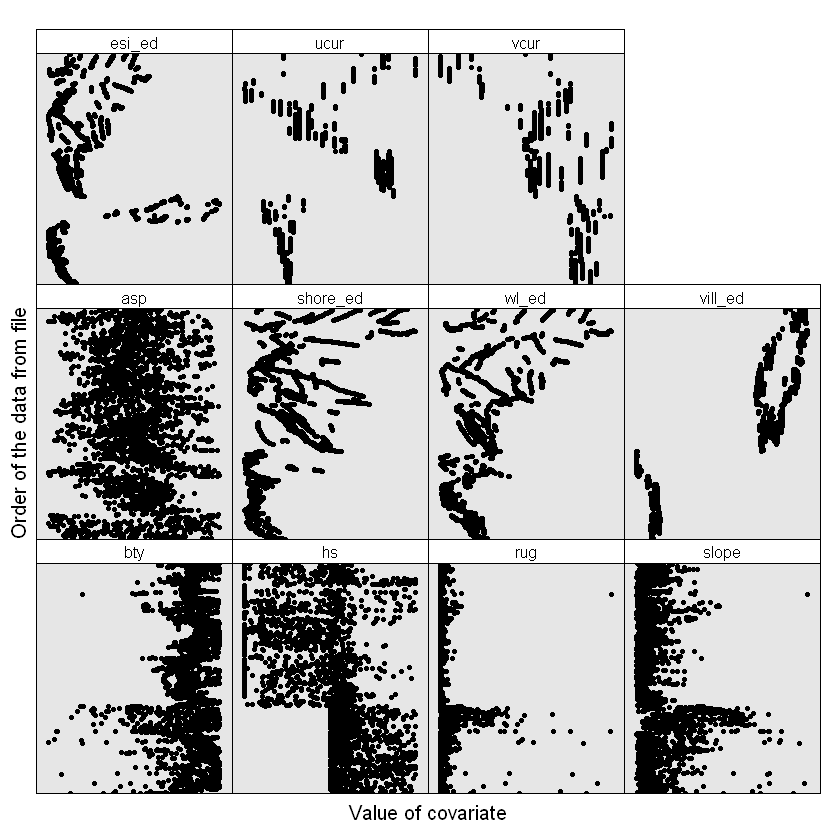

In [9]:
Z<-branching[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

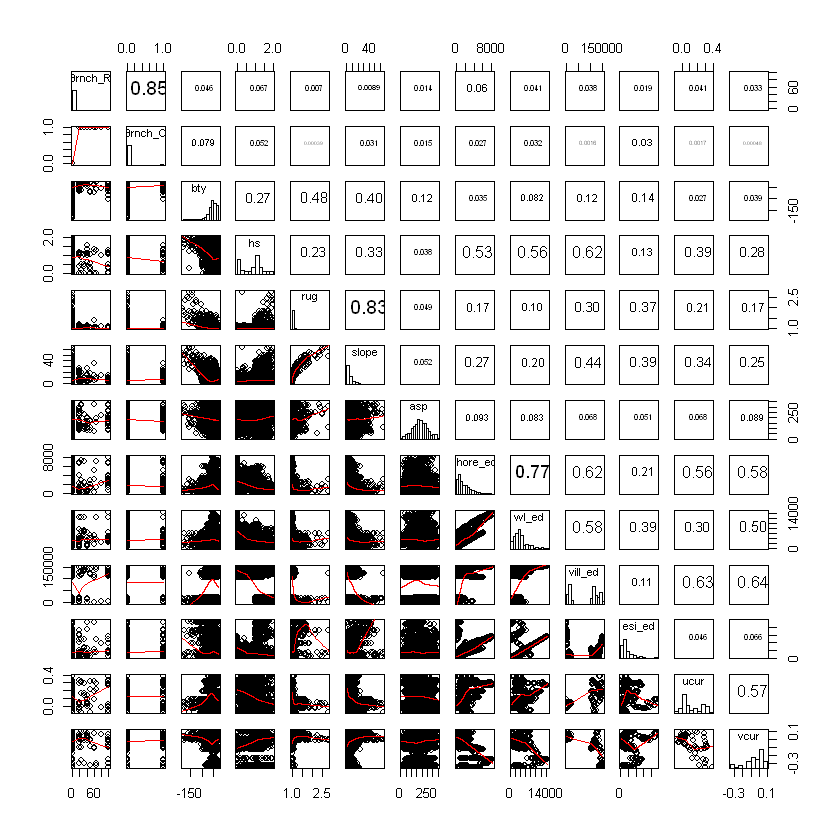

In [10]:
pairs(branching[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Branching** notes on correlations, outliers etc:

- High correlations: rugosity (not using) and slope; euclidean distance from shore and e. d. from wetlands (not using)
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Branching predictors: bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur

In [11]:
branching$X<-NULL
branching$coords.x1<-NULL
branching$coords.x2<-NULL

##### Columnar

In [12]:
coords<-cbind(columnar$lon,columnar$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

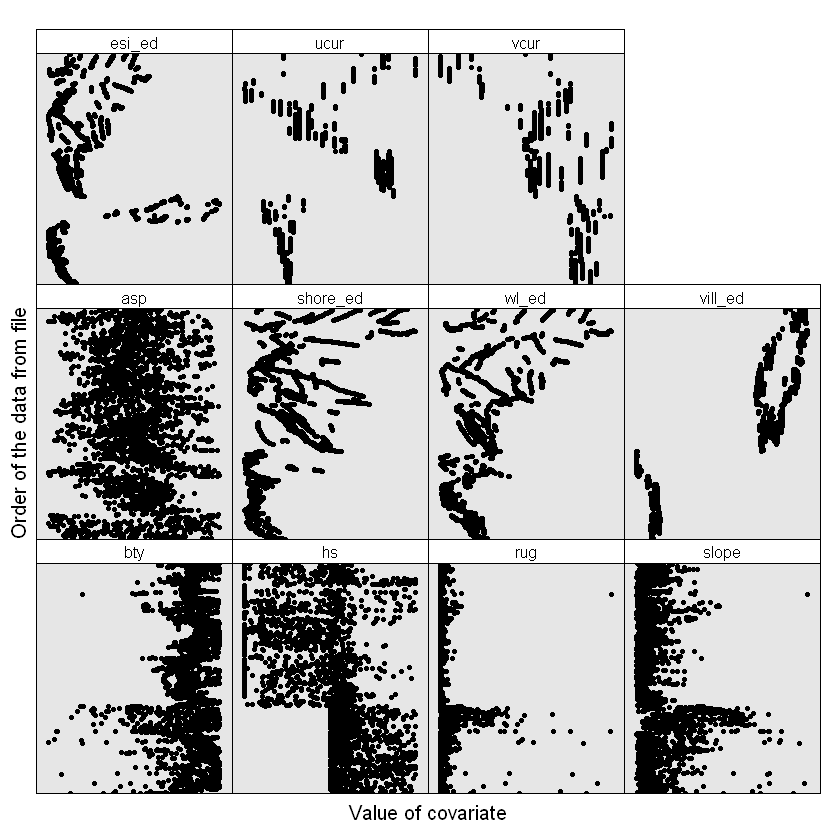

In [13]:
Z<-columnar[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

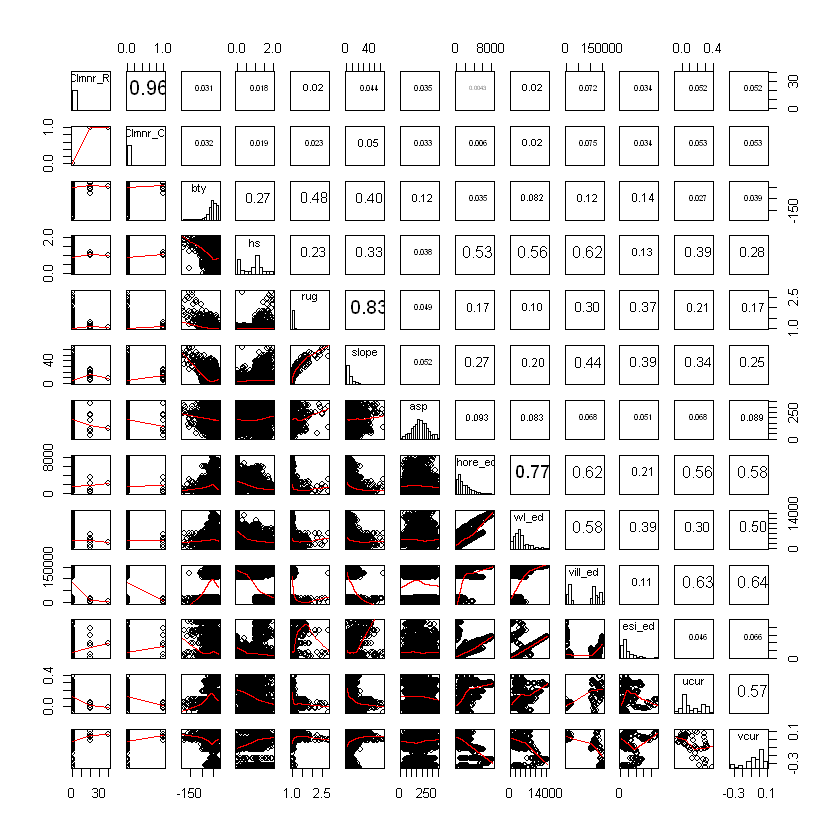

In [14]:
pairs(columnar[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Columnar** notes on correlations, outliers etc:

- High correlations: rugosity and slope (not using) ; euclidean distance from shore (not using) and e. d. from wetlands
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Columnar predictors: bty, hs, rug, asp, wl_ed, vill_ed, esi_ed, ucur, vcur

In [15]:
columnar$X<-NULL
columnar$coords.x1<-NULL
columnar$coords.x2<-NULL

##### Encrusting

In [16]:
coords<-cbind(encrusting$lon,encrusting$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

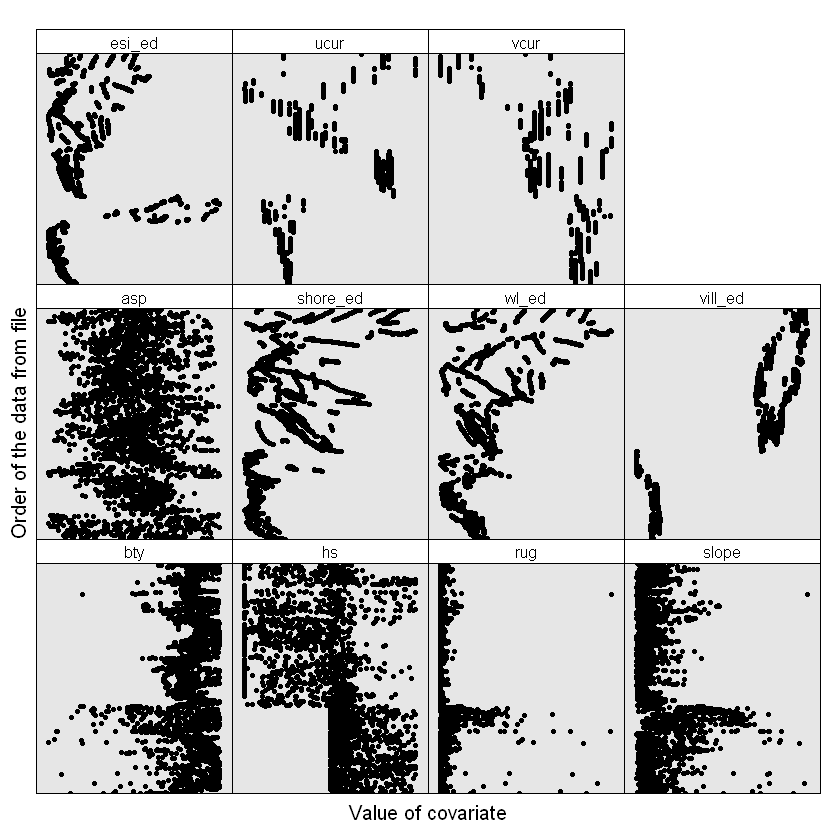

In [17]:
Z<-encrusting[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

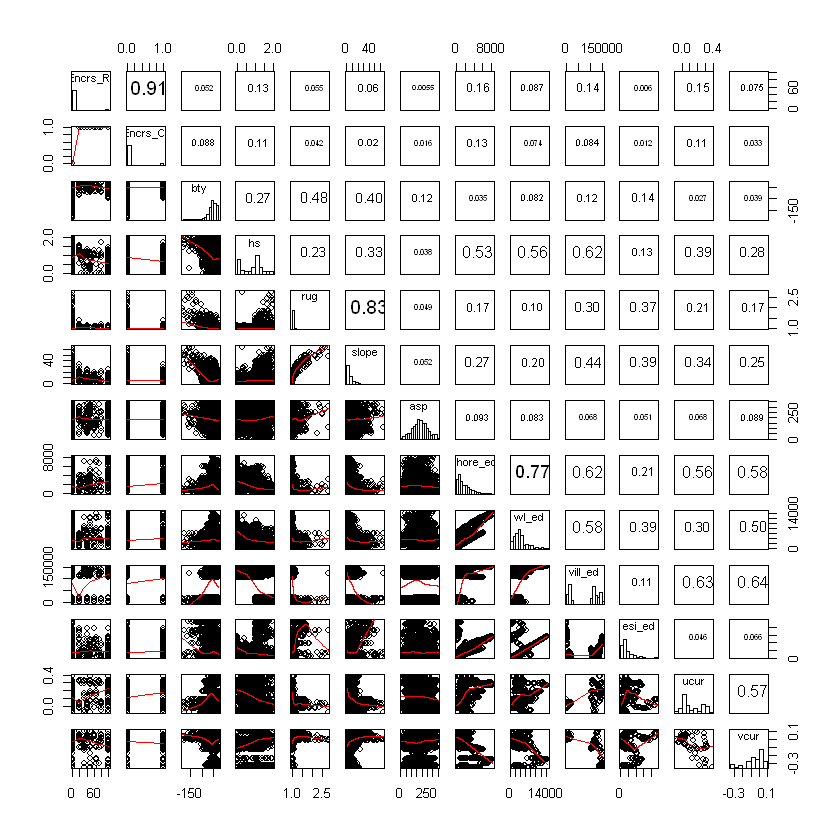

In [18]:
pairs(encrusting[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Encrusting** notes on correlations, outliers etc:

- High correlations: rugosity and slope (not using) ; euclidean distance from shore and e. d. from wetlands (not using) 
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Encrusting predictors: bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur

##### Free living

In [19]:
coords<-cbind(free_livin$lon,free_livin$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

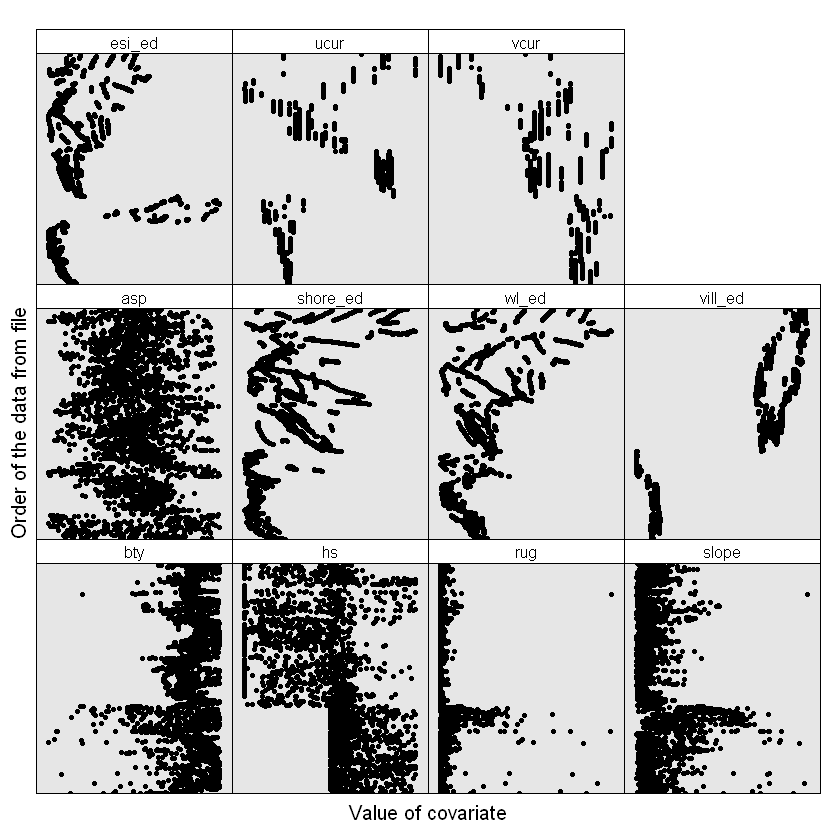

In [20]:
Z<-free_livin[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

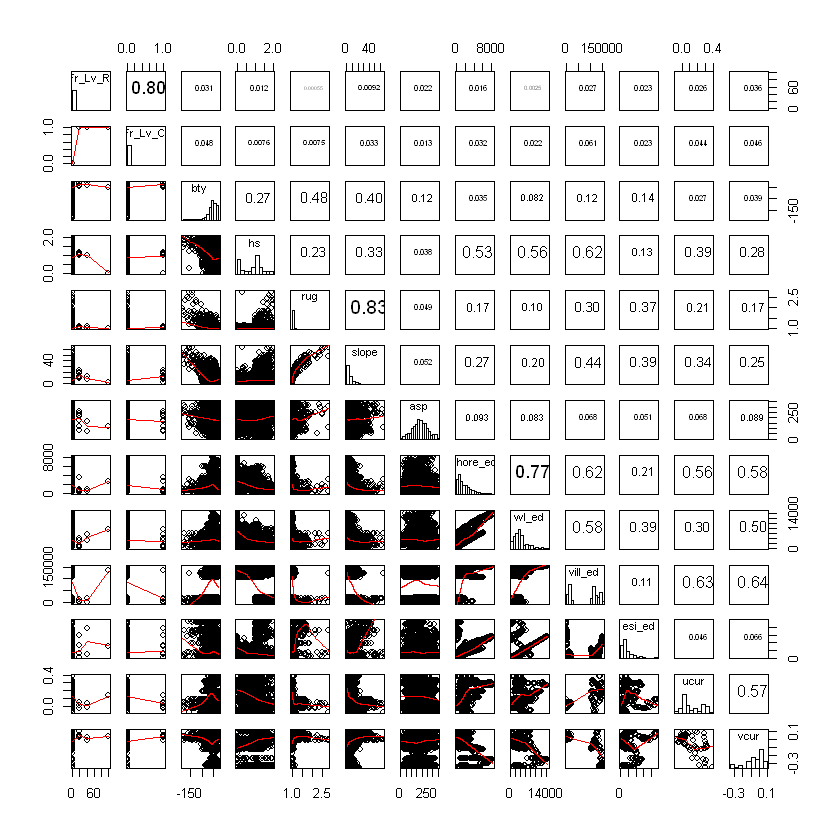

In [21]:
pairs(free_livin[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Free living** notes on correlations, outliers etc:

- High correlations: rugosity (not using) and slope; euclidean distance from shore and e. d. from wetlands (not using)
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Free living predictors: bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur

##### Massive

In [22]:
coords<-cbind(massive$lon,massive$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

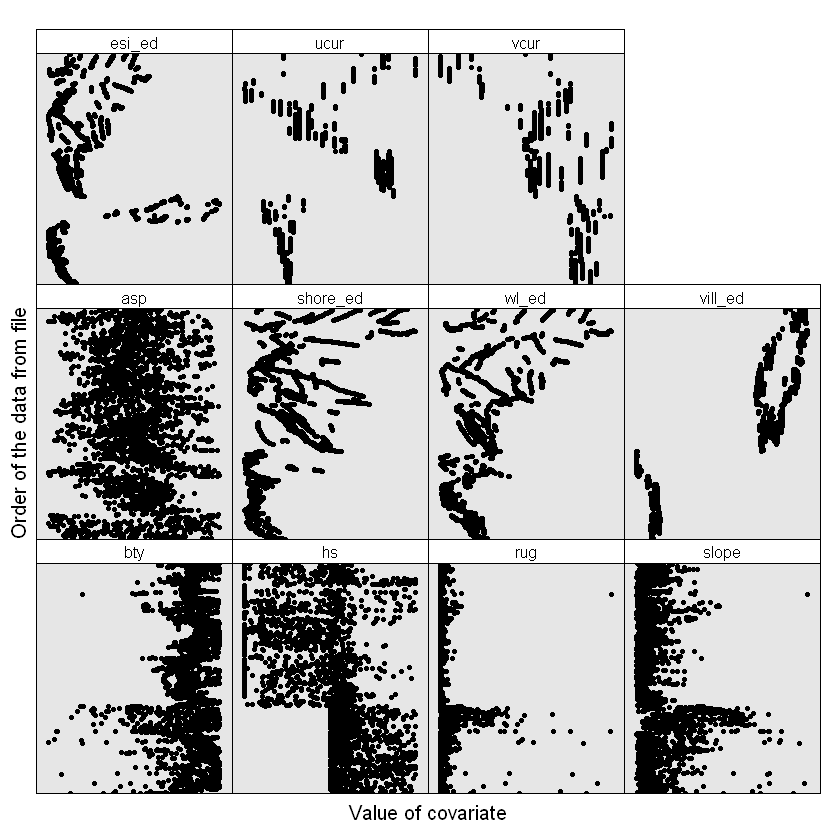

In [23]:
Z<-massive[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

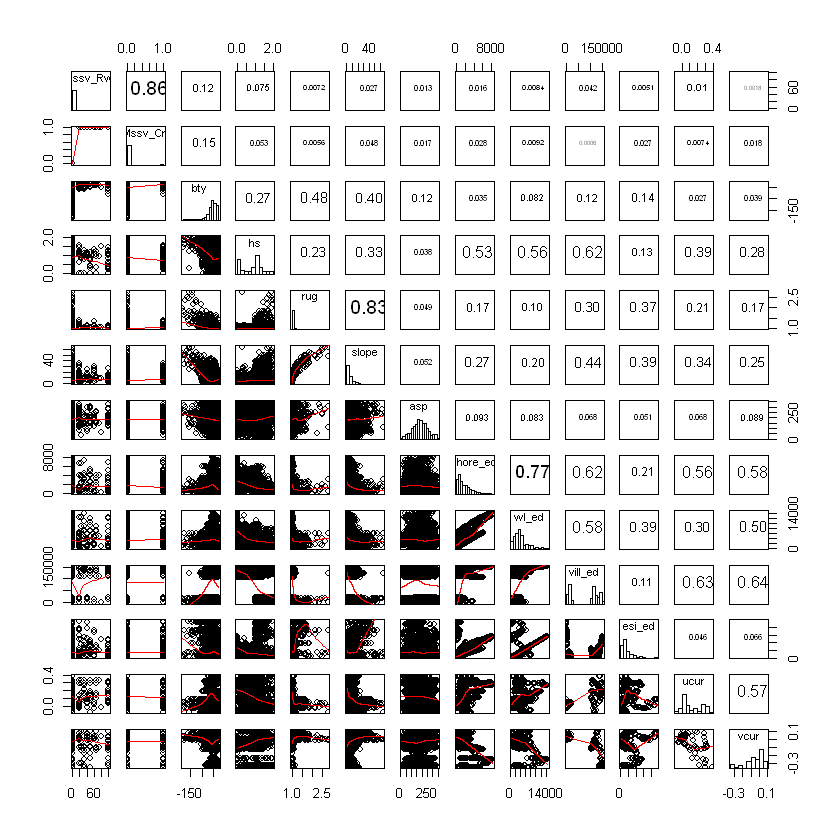

In [24]:
pairs(massive[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Massive** notes on correlations, outliers etc:

- High correlations: rugosity (not using) and slope; euclidean distance from shore and e. d. from wetlands (not using)
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Free living predictors: bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur

##### Plate

In [25]:
coords<-cbind(plate$lon,plate$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

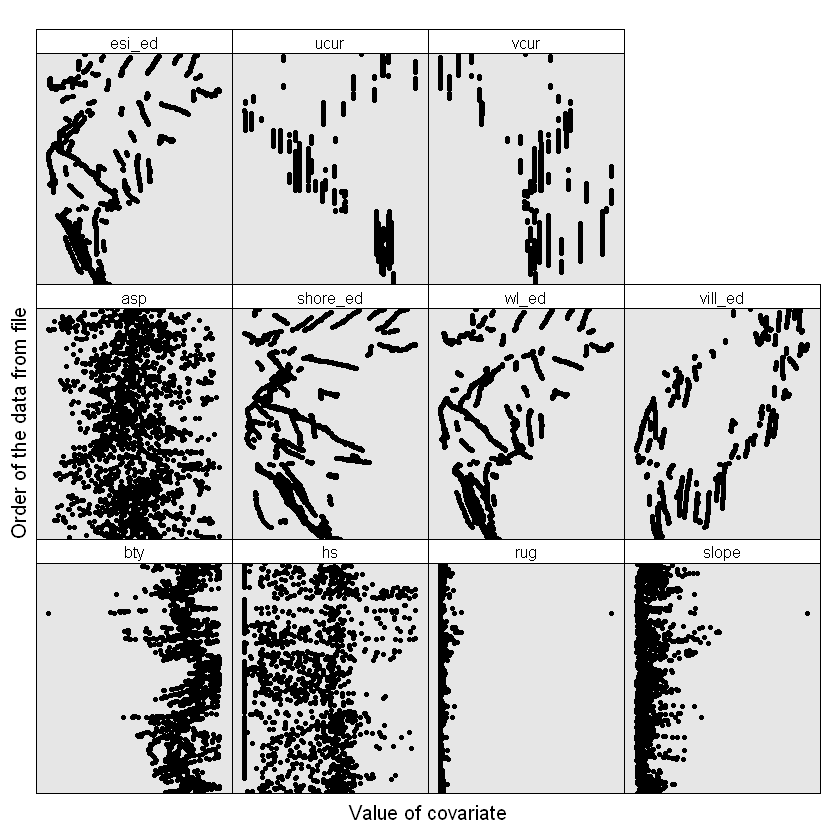

In [26]:
Z<-plate[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

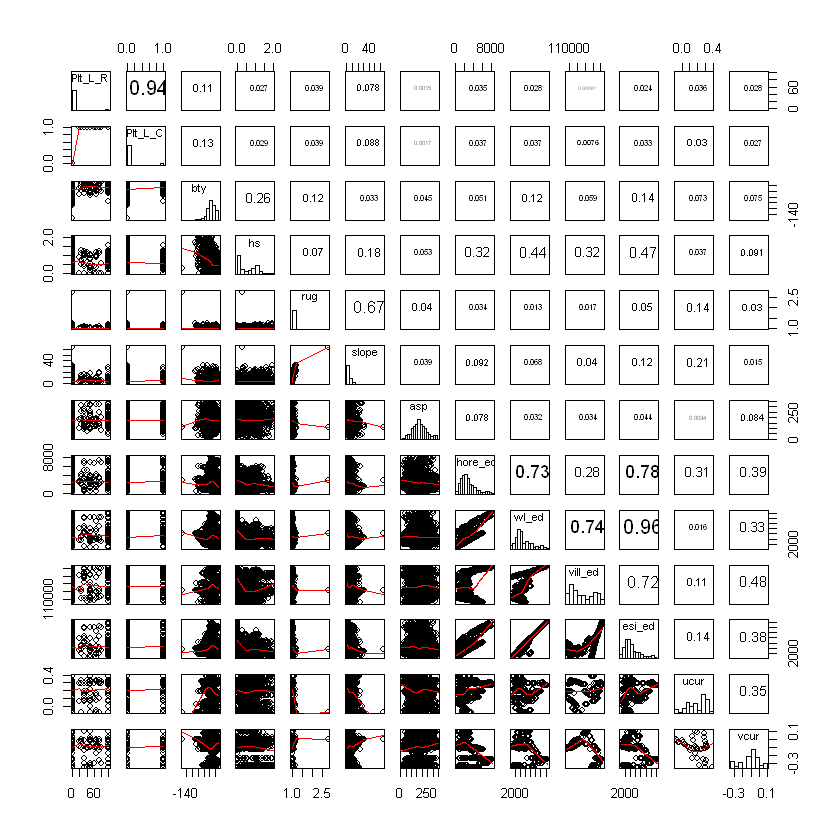

In [27]:
pairs(plate[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Plate** notes on correlations, outliers etc:

- High correlations: euclidean distance from shore and e. d. from wetlands (not using)
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Plate predictors: bty, hs, rug, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur

##### Scler

In [28]:
coords<-cbind(scler$lon,scler$lat)
coordsSP<-SpatialPoints(coords,proj4string=CRS(as.character(NA)))
zerodist(coordsSP,zero=0.0)

[,1] [,2]

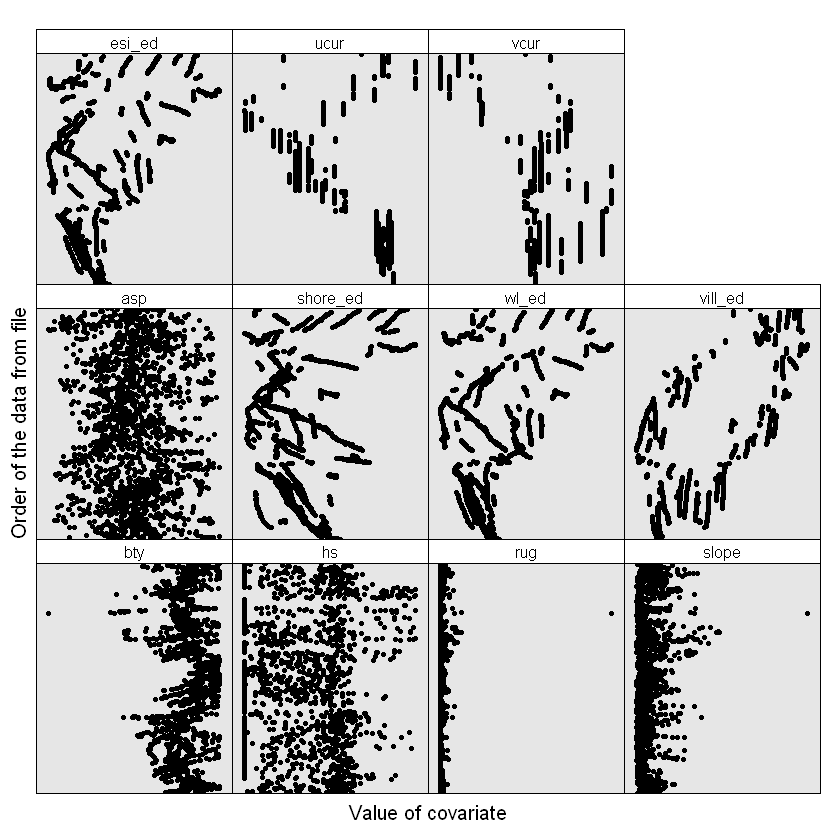

In [29]:
Z<-scler[,c(7:13, 15, 17:19)]
dotplot(as.matrix(Z),groups=FALSE,
        strip=strip.custom(bg='white',par.strip.text=list(cex=0.8)),
        scales=list(x=list(relation="free"),y=list(relation="free"),
        draw=FALSE),col=1,cex=0.5,pch=16,xlab="Value of covariate",
        ylab="Order of the data from file")

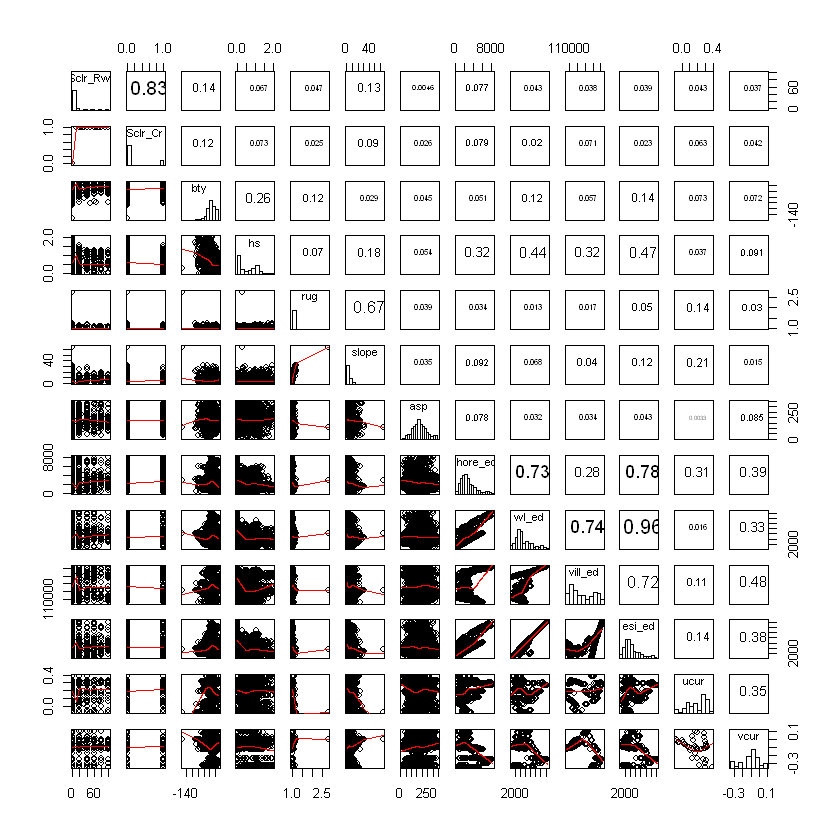

In [30]:
pairs(scler[,c(3, 6, 7:13, 15, 17:19)],upper.panel=panel.cor,diag.panel=panel.hist,lower.panel=panel.smooth)

**Scler** notes on correlations, outliers etc:

- High correlations: esi euclidean distance from several variables (not using); shore e. d. and vill e.d. with e. d. from wetlands (not using)
- Inspected larger-than-average slope values; appear to be valid, from a deep, sloped region

Free living predictors: bty, hs, rug, slope, asp, shore_ed, vill_ed, ucur, vcur

## Select columns, write dfs

In [31]:
setwd('C:/Users/linds/OneDrive/Documents/samoa_corals_data/')

##### Scler 

In [32]:
scler$bty<-scler$bty*-1
scler_binary_df <- scler %>%
  select(ID, lon, lat, Sclr_Cr, bty, hs, rug, slope, asp, shore_ed, vill_ed, ucur, vcur)

scler_percent_df <- scler %>%
  select(ID, lon, lat, Sclr_Rw, bty, hs, rug, slope, asp, shore_ed, vill_ed, ucur, vcur)

write.csv(scler_binary_df, 'scler_binary.csv')
write.csv(scler_percent_df, 'scler_percent.csv')

##### Plate

In [33]:
plate$bty<-plate$bty*-1
plate_binary_df <- plate %>%
  select(ID, lon, lat, Plt_L_C, bty, hs, rug, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

plate_percent_df <- plate %>%
  select(ID, lon, lat, Plt_L_R, bty, hs, rug, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(plate_binary_df, 'plate_binary.csv')
write.csv(plate_percent_df, 'plate_percent.csv')

##### Massive

In [34]:
massive$bty<-massive$bty*-1
massive_binary_df <- massive %>%
  select(ID, lon, lat, Mssv_Cr, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

massive_percent_df <- massive %>%
  select(ID, lon, lat, Mssv_Rw, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(massive_binary_df, 'massive_binary.csv')
write.csv(scler_percent_df, 'massive_percent.csv')

##### Free living

In [35]:
free_livin$bty<-free_livin$bty*-1
free_livin_binary_df <- free_livin %>%
  select(ID, lon, lat, Fr_Lv_C, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

free_livin_percent_df <- free_livin %>%
  select(ID, lon, lat, Fr_Lv_R, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(free_livin_binary_df, 'free_livin_binary.csv')
write.csv(free_livin_percent_df, 'free_livin_percent.csv')

##### Encrusting

In [36]:
encrusting$bty<-encrusting$bty*-1
encrusting_binary_df <- encrusting %>%
  select(ID, lon, lat, Encrs_C, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

encrusting_percent_df <- encrusting %>%
  select(ID, lon, lat, Encrs_R, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(encrusting_binary_df, 'encrusting_binary.csv')
write.csv(encrusting_percent_df, 'encrusting_percent.csv')

##### Branching

In [37]:
branching$bty<-branching$bty*-1
branching_binary_df <- branching %>%
  select(ID, lon, lat, Brnch_C, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

branching_percent_df <- branching %>%
  select(ID, lon, lat, Brnch_R, bty, hs, slope, asp, shore_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(branching_binary_df, 'branching_binary.csv')
write.csv(branching_percent_df, 'branching_percent.csv')

##### Columnar

In [38]:
columnar$bty<-columnar$bty*-1
columnar_binary_df <- columnar %>%
  select(ID, lon, lat, Clmnr_C, bty, hs, rug, asp, wl_ed, vill_ed, esi_ed, ucur, vcur)

columnar_percent_df <- columnar %>%
  select(ID, lon, lat, Clmnr_R, bty, hs, rug, asp, wl_ed, vill_ed, esi_ed, ucur, vcur)

write.csv(columnar_binary_df, 'columnar_binary.csv')
write.csv(columnar_percent_df, 'columnar_percent.csv')